In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
df = pd.read_csv("../data/final_dataset.csv")
df.head()


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [3]:
df.shape


(1461, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [5]:
df.isna().sum()


Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [6]:
df = df.fillna(method="ffill")


C:\Users\hp\AppData\Local\Temp\ipykernel_3884\3441110583.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


**AQI Categories (Indian Standard)**
AQI Range	Category 

0–50	Good

51–100	Satisfactory

101–200	Moderate

201–300	Poor

301–400	Very Poor

401–500	Severe


In [7]:
def aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

df["quality"] = df["AQI"].apply(aqi_category)
df["quality"].value_counts()


quality
Moderate        463
Poor            384
Satisfactory    267
Very Poor       231
Severe           65
Good             51
Name: count, dtype: int64

In [9]:
print(df[df["quality"]=="Good"])

      Date  Month  Year  Holidays_Count  Days  PM2.5   PM10    NO2    SO2  \
139     20      5  2021               0     4  58.50  43.06  27.87   5.22   
199     19      7  2021               0     1  38.03  15.72  28.70   8.94   
208     28      7  2021               0     3  24.57  32.89  16.14   6.06   
209     29      7  2021               0     4  31.12  60.07  18.29   6.78   
232     21      8  2021               0     6  28.00  24.60  24.01   7.63   
242     31      8  2021               0     2  29.47  39.15  27.81   7.24   
244      2      9  2021               0     4  42.23  53.21  22.78   7.46   
246      4      9  2021               0     6  40.13  50.65  32.74   8.71   
253     11      9  2021               0     6  31.73  31.49  29.61   8.78   
254     12      9  2021               1     7  37.69  53.58  25.28   8.83   
256     14      9  2021               0     2  34.25  67.30  22.61   7.69   
259     17      9  2021               0     5  23.99  44.07  26.73   3.76   

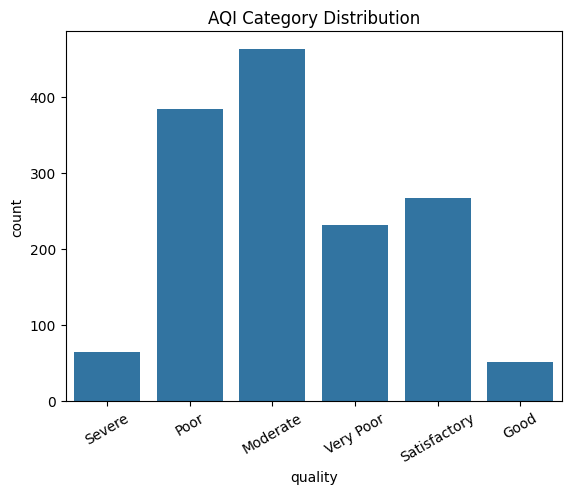

In [10]:
sns.countplot(x="quality", data=df)
plt.title("AQI Category Distribution")
plt.xticks(rotation=30)
plt.show()


In [11]:
df.to_csv("../data/cleaned_aqi_data.csv", index=False)
